# Final Project Report

#### STATS 102 Introduction to Data Science Session 2, 2019 Fall

---

# Identifying Bird Species in Accipitriformes Order Using Maching Learning

- Yifei Gao (yg190@duke.edu)
- Zhujun Yao (zy128@duke.edu)
- Winnie Liao (sl650@duke.edu)

## 1 Introduction


Birds are important in terms of ecology, economics, culture, aesthetics, and spirituality (Purvis & Hector, 2000). Some birds are frequently served as keystone species due to their disproportionately huge influence on their natural habitat in comparison to their abundance, like raptors (Carignan & Villard, 2002). Raptors are top predators and scavengers from an ecological standpoint, essential for preserving ecosystem structure, function, and ecosystem services (Cruz et al., 2021). Also, because their presence, abundance, and reproductive success have been demonstrated to be impacted by the character and structure of surrounding habitats, birds can be chosen as indicator species for a monitoring program aimed at maintaining or restoring ecosystem function (Carignan & Villard, 2002). 


Our study object, Accipitriformes is the largest diurnal raptor bird order (“Accipitriformes,” 2022). Raptors at the top of the food chain are referred to as indicator species since they are most severely impacted by threats including pesticides, habitat loss, and climate change. By analyzing raptor population patterns, we can detect environmental change in an economical and effective manner, enabling us to take conservation measures that are supported by the most recent scientific findings (Hawkwatch International - Why Raptors?, n.d.).


Studies show that raptors have both greater proportions of threatened and declining species than non-raptors. And Accipitriformes has greater-than-average proportions of threatened and declining species, indicating that raptors are in need of increased conservation attention (McClure & Rolek, 2020). There is a need for studies on advanced techniques like DNA barcode sequencing and bird species classification using machine learning, as a complement for traditional ecological fieldwork.   


Using specific gene sequences to identify bird species is more efficient for identifying raptors, and can reduce the money needed for long gene segments sequencing. Thus, it can be beneficial to studies and practices as listed below.

1.	Evolutionary Biology Studies: Evolutionary biology is a subdiscipline of the biological sciences concerned with the origin of life and the diversification and adaptation of life forms over time (Evolutionary Biology - Latest Research and News | Nature, n.d.). We can answer questions like how closely related to raptors are, and how a new species of raptor is formed through collecting and analyzing the gene sequences.

2.	eDNA for Wildlife Research: 
Environmental DNA or eDNA is DNA that is collected from a variety of environmental samples such as soil, seawater, snow or air (Environmental DNA - Wikipedia, n.d.). It is a more efficient way than traditional wildlife research to identify species abundance within a region. 

3.	Illegal Wildlife Trade: 
Illegal trade threatens the survival of many wild species, and molecular forensics can shed light on various questions raised during the investigation of cases of illegal trade (Gonçalves et al., 2015). 

Our project aims to use DNA sequences to judge similarity between or inside 3 families under Accipitriformes order and to identify the accipitriformes birds to species level by machine learning.

## 2 Background 

Our study focuses on Accipitriformes, currently with 262 species and 75 genera in 4 extant families and possibly 1 extinct family, containing most of the diurnal raptors (“Accipitriformes,” 2022). Four families under Accipitriformes Order include: 1) Accipitridae (vultures, eagles, harriers, hawks, kites), 2) Pandionidae (ospreys), 3) Cathartidae (Cathartid vultures and condors), 4) Sagittariidae (secretarybird). We ignore the Sagittariidae family for our project due to limited DNA sample sizes for species under this family.

Deoxyribonucleic acid, also known as DNA, is the molecule that carries the genetic material necessary for an organism's growth and operation (Deoxyribonucleic Acid (DNA), n.d.). The double helix structure of a DNA molecule is made up of two twisted paired strands. Adenine [A], cytosine [C], guanine [G], and thymine [T] are the four nucleotides that make up DNA (Double Helix, n.d.). The DNA barcode for identifying species is made up of short DNA sequences from a defined section of the genome (Hebert et al., 2004). A good DNA barcode should have low intra-specific and high inter-specific variability. Studies shows that the DNA gene, cytochrome c oxidase I (COI) sequence that changes more between species as opposed to minor variations within species supports the efficacy of COI barcodes for bird species identification (Dawnay et al., 2007; Hebert et al., 2004). 

According to Dr. Ernest Bonat ([2021](https://medium.com/mlearning-ai/apply-machine-learning-algorithms-for-genomics-data-classification-132972933723)), DNA sequence has two common manipulation method: One-hot Encoding and K-mer Counting. One-hot encoding was used often when DNA samples have the same length, which makes the locus among DNA samples comparable. However, one-hot encoding might result in higher dimensional data ([Fang et al.,2021](https://www.sciencedirect.com/science/article/pii/S1877050921008553)). For example, a 7-nucleotide sequence will result in a vector of $4^7 = 16384$ dimension. 

Comparatively, K-mer method is easier to compute and understand. Recent researchers have widely implement this method in their DNA sequence for feature extraction and phylogenetic tree computation ([Fang et al., 2021](https://www.sciencedirect.com/science/article/pii/S1877050921008553), [Pornputtapong et al., 2020](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7538862/), [Ying et al., 2020](https://www.frontiersin.org/articles/10.3389/fmicb.2020.02067/full), [Das et al., 2018](https://www.sciencedirect.com/science/article/pii/S0888754317301453) ). K-mer method splice the DNA sequence into k-nucleotide fragment with the stepsize of one basepair. Each k-mer fragment serves as a feature. It is possible to combine continuous k-mers fragment as a new feature to reduce intensive calculation and optimize features. The combination of K-mer fragment as a feature provide localized continuous sequence information. For example, while feature [tggt] might occurs in many species, feature [atgg tggt ggtt] might not be common as the left and rightmost nucleotides can to some extend localize the sequence to a specific position. 



## 3 Design and Implementation


The workflow contains four main steps: retrieve data from NCBI, convert the raw data into k-mers, use ‘CountVectorizer’ to show the pieces appearance in sequences, choose the models to train the data. 

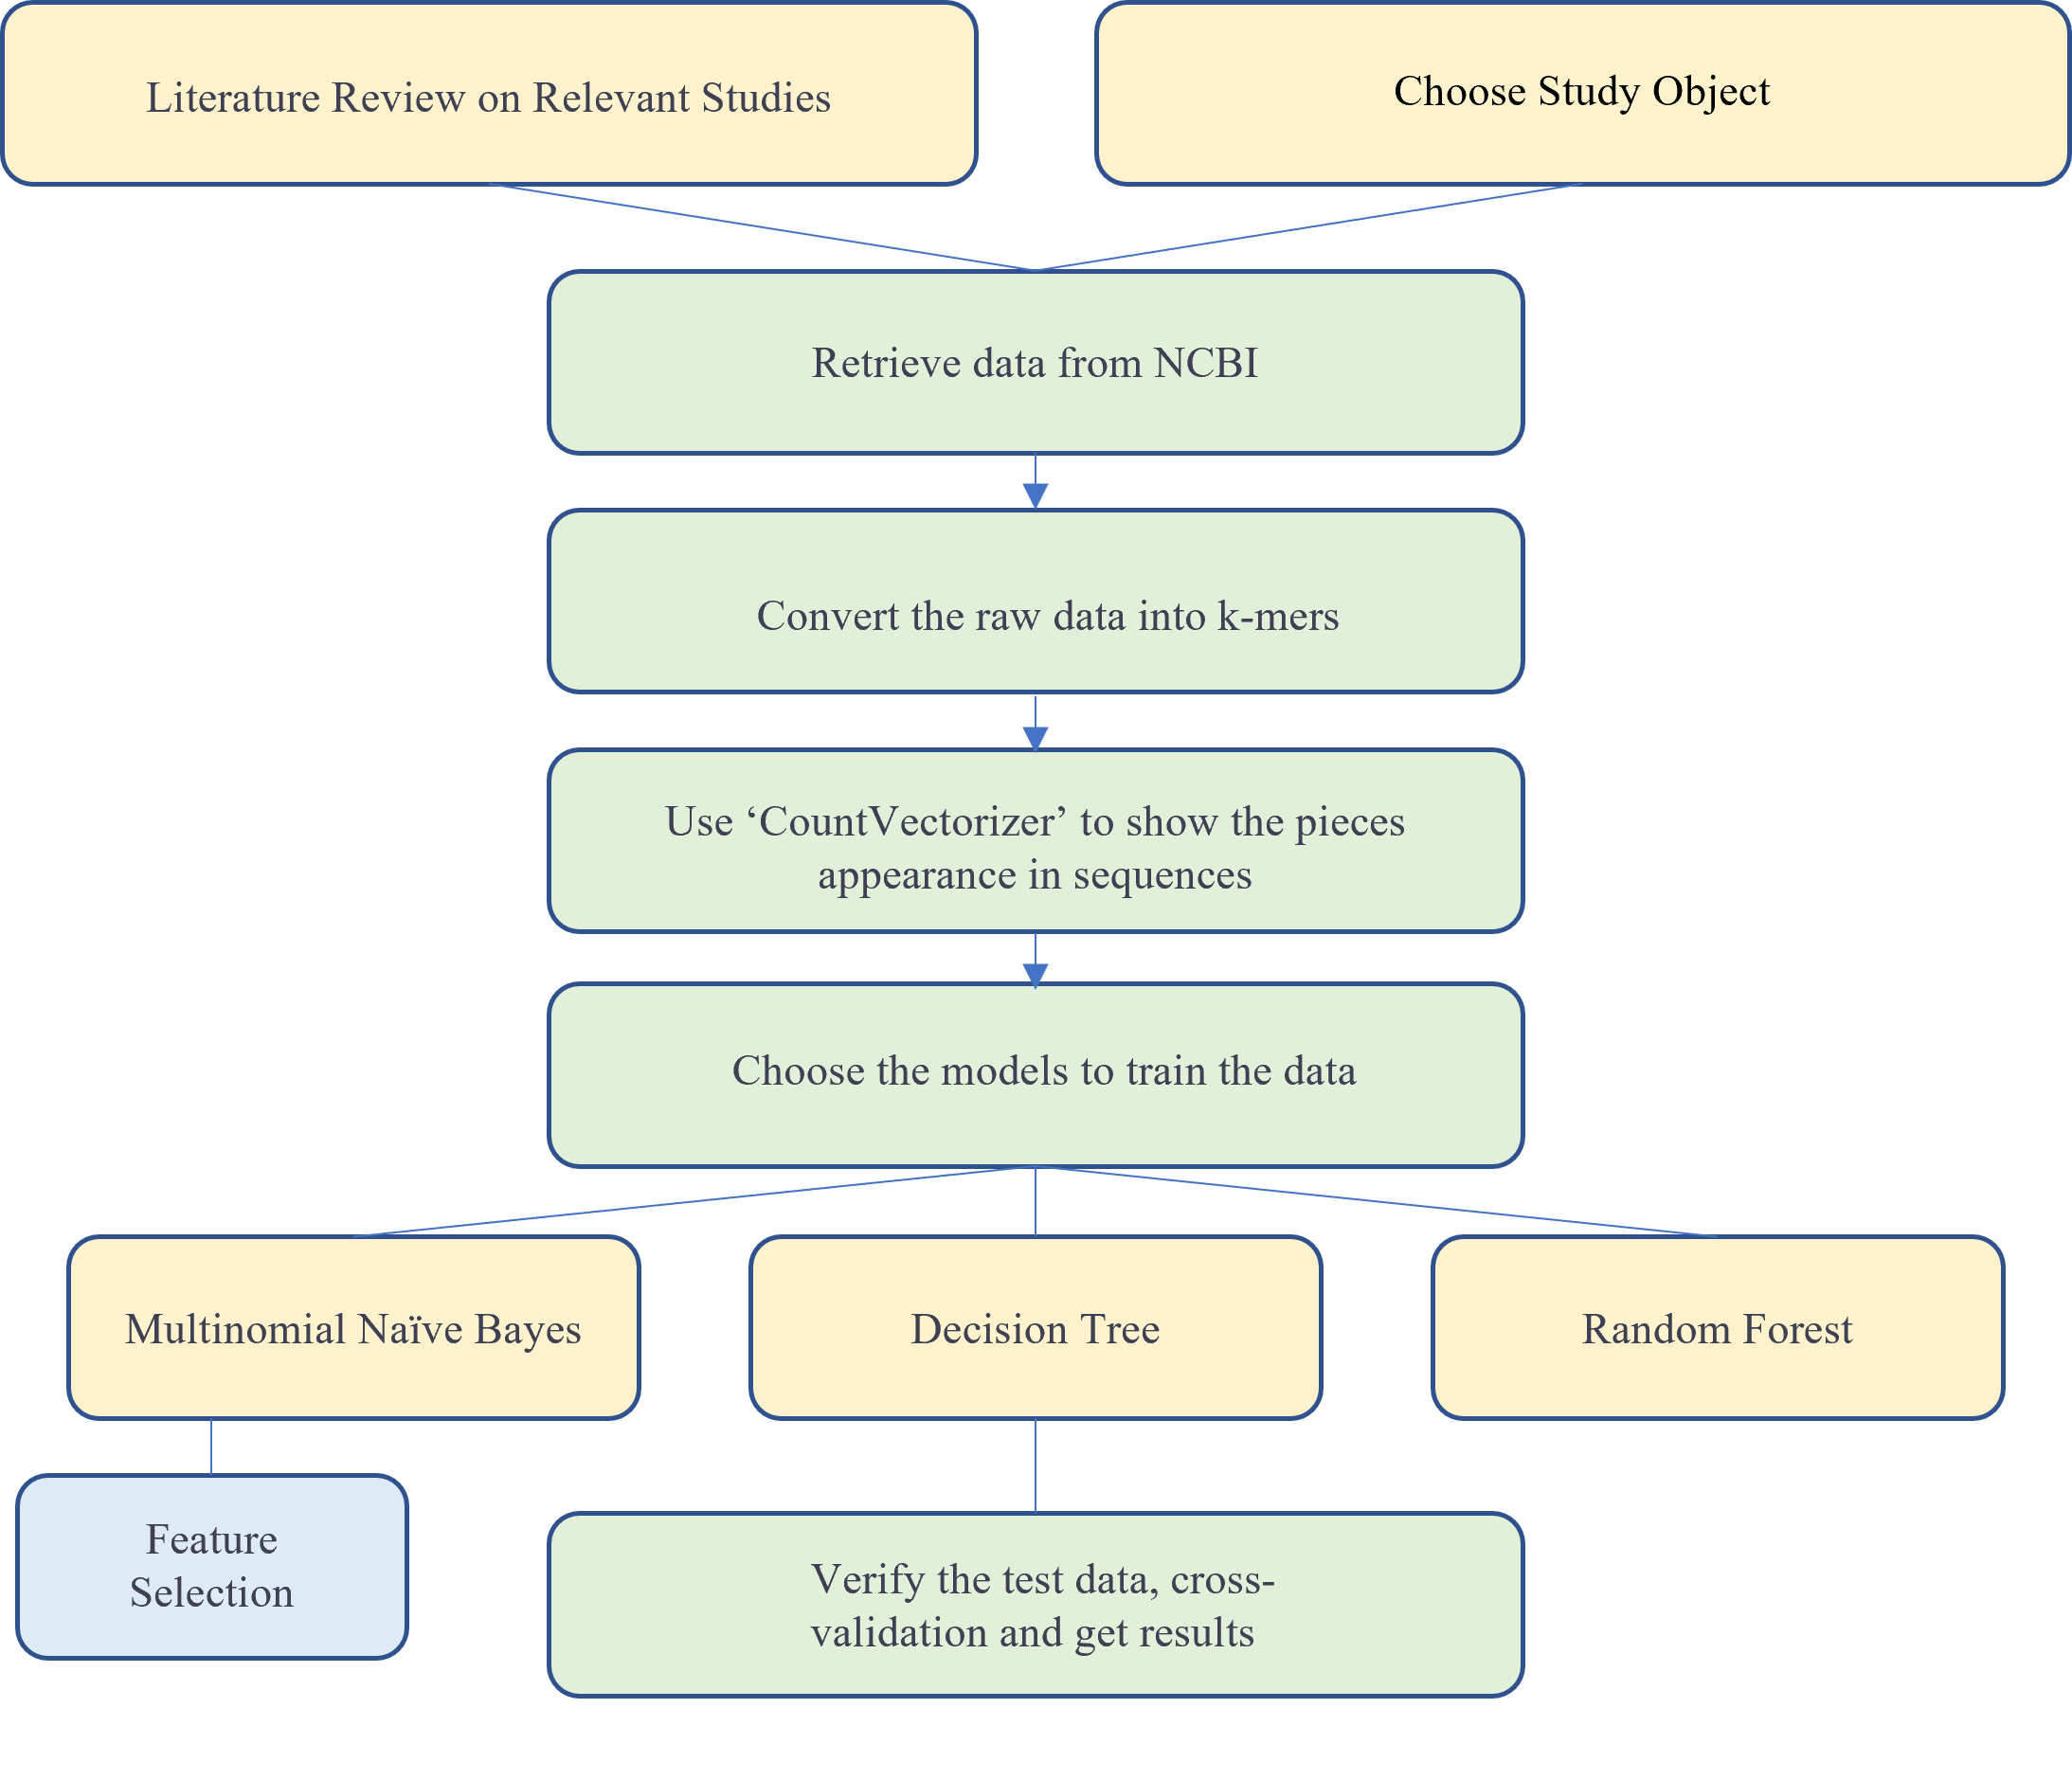

In [1]:
from IPython.display import display, Image
display(Image(filename='workflow.png'))

First, we have imported the packages for further analysis:

In [10]:
pip install biopython --user

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install seaborn

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
import seaborn as sns#; sns.set_theme()
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from Bio import Entrez
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import model_selection  
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import time
import numpy as np
from sklearn.feature_selection import mutual_info_classif
#from pydna import PyDNA



Our data comes from National Center of Biotechnology Information ([NCBI](https://www.ncbi.nlm.nih.gov/)). The DNA sequences are uploaded by other researchers who has done wet lab experiments and DNA sequencing with published materials. Each entry has its accession number. Since Biopython has developed a package call [Bio.Entrez](https://biopython.org/docs/1.76/api/Bio.Entrez.html), we are able to download DNA sequences from the databank by inputing the accession number. We have created a CSV file that include the following information:


1.   Accession number
2.   Family, genus, and species
3. DNA Sequence 

Due to the limited samples of Family Sagittaridae and other species, we have excluded the DNA samples that are smaller than 19 entries, so that the data is relatively balanced, which means where each specie is represented by similar number of input samples.    
The code to download DNA sequences is as below. The acession number of each species are automatically downloaded from NCBI databank in txt files. Then, the files are opended and the data of each entry is recorded in lists. Eventually the lists are combined and convert into a dataframe.






In [ ]:
Entrez.email ="zy128@duke.edu"
species_total = ['Accipitridae_Circaetus gallicus','Accipitridae_Accipiter gentilis','Accipitridae_Accipiter nisus','Accipitridae_Accipiter tachiro','Accipitridae_Pithecophaga jefferyi','Accipitridae_Sarcogyps calvus','Accipitridae_Milvus migrans','Accipitridae Buteo buteo','Accipitridae_Accipiter badius','Accipitridae_Haliaeetus leucocephalus','Cathartidae_Vultur gryphus','Pandionidae_Pandion haliaetus']
gene_file = ['Sequence_Accipitridae_Circaetus gallicus voucher.seq','Sequence_Accipitridae_Accipiter gentilis voucher.seq','Sequence_Accipitridae_Accipiter nisus voucher.seq','Sequence_Accipitridae_Accipiter tachiro voucher.seq','Sequence_Accipitridae_Pithecophaga_jefferyi voucher.seq','Sequence_Accipitridae_Sarcogyps calvus voucher.seq','Sequence_Accipitridae_Milvus migrans voucher.seq','Sequence_Accipitridae Buteo buteo voucher.seq','Sequence_Accipitridae_Accipiter badius voucher.seq','Sequence_Accipitridae_Haliaeetus leucocephalus voucher.seq','Sequence_Cathartidae_Vultur gryphus.seq','Sequence_Pandionidae_Pandion haliaetus.seq']
for i in range (0,len(species_total)):  
    f = open(gene_file[i])
    for line in iter(f):
        line = line.rstrip().split('.')[0]
        handle = Entrez.efetch(db="nucleotide", id=line.rstrip(), retmode="xml")
        records = Entrez.read(handle)
        print (">GI "+line.rstrip()+" "+records[0]["GBSeq_primary-accession"]+" "+records[0]["GBSeq_definition"]+"\n"+records[0]["GBSeq_sequence"])
        Sequence.append(records[0]["GBSeq_sequence"])
        Accession_number.append(records[0]["GBSeq_primary-accession"])
        Species.append(species_total[i])
  
    f.close()
print ('End!')
birds_COI = {'Accession number':Accession_number,'Species':Species,'Type':'COI','COI sequence':Sequence}
birds_COI_df = pd.DataFrame(birds_COI)
birds_COI_df.to_csv('birds_COI.csv',index = None)

Here is a glimpse of our data, which contamins 334 entries and spans 12 birds species. Each specie class is represented by the similar number of input samples.

In [19]:
birds_COI_df = pd.read_csv('birds_COI.csv')
birds_COI_df

,Accession number,Species,Type,COI sequence
0,MZ402652,Accipitridae_Circaetus gallicus,COI,atagtcggcactgccctcagcctacttatccgcgcagaactcggcc...
1,MZ402651,Accipitridae_Circaetus gallicus,COI,tagtcggcactgccctcagcctacttatccgcgcagaactcggcca...
2,MZ402650,Accipitridae_Circaetus gallicus,COI,ccaaccaggcaccctcctaggcgacgatcagatctacaatgtaatc...
3,MZ402649,Accipitridae_Circaetus gallicus,COI,cgcagaactcggccaaccaggcaccctcctaggcgacgatcagatc...
4,MZ402648,Accipitridae_Circaetus gallicus,COI,atagtcggcactgccctcagcctacttatccgcgcagaactcggcc...
...,...,...,...,...
330,AB842994,Pandionidae_Pandion haliaetus,COI,acactatatctaatcttcggcgctgagccggcatagttggtactgc...
331,KF946773,Pandionidae_Pandion haliaetus,COI,ctatatctaatctttggcgcctgagccggcatagttggtactgctc...
332,DQ434697,Pandionidae_Pandion haliaetus,COI,acactanatctaatcttnggnncntgagccggcatagttggtaccg...
333,DQ434696,Pandionidae_Pandion haliaetus,COI,acactatatctaatcttcggcgcntgagccggcatagttggtaccg...


Text(0.5, 1.0, 'Fig 1. The number of representitive samples for 12 bird species')

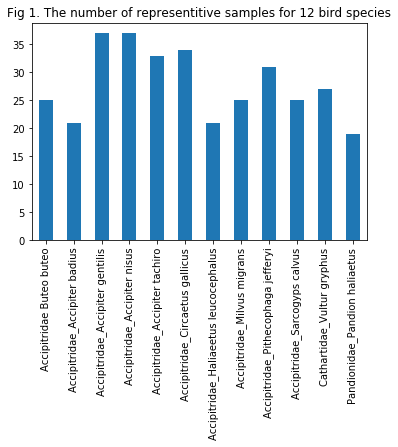

In [20]:
birds_COI_df['Species'].value_counts().sort_index().plot.bar() 
plt.title('Fig 1. The number of representitive samples for 12 bird species')

We have decided to use K_mer method to analyse DNA sequences as mentioned in the background.




Text(0.5, 1.0, 'Fig 2.The length of COI DNA samples')

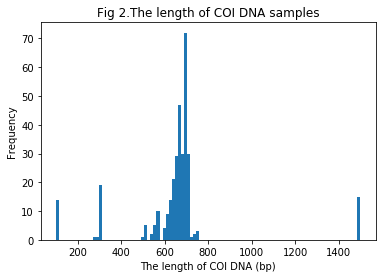

In [21]:
#The code to see hte distribution of DNA size
seq_lens=[]
for i in range (0,len(birds_COI_df)):
    seq_lens.append(len(birds_COI_df['COI sequence'].iloc[i]))
birds_COI_df['COI sequence length']=seq_lens
birds_COI_df['COI sequence length'].plot.hist(bins = 100) 
plt.xlabel('The length of COI DNA (bp)')
plt.title("Fig 2.The length of COI DNA samples")

When generating appropriate features, we need to make sure that the feature sequence was not to general and not too specific either. A feature with too short nucleotide information will not present meaningful functional data, yet a feature too long might result in overfitting because it might describe a data entry better rather than the overall species ([Ying et al., 2020](https://www.frontiersin.org/articles/10.3389/fmicb.2020.02067/full)). For distinguishing DNA barcodes, Zhou and his colleges have optimized their k selection to $1<=k<=6$. Arguments proposed by Csürös et al. ([2007](https://pubmed.ncbi.nlm.nih.gov/17964682/)) suggested that choosing k-mers with heavier distribution tail better discribe the genomic features. Therefore, after checking the sum of each feature's count and compute the heatmap of features specificity, we decides to use the feature K-mers of 6 and set n_gram to (2,4), which indicates a combination of 2-4 k-mers is used as a set of features (**Fig 3 & 4**). The code of processing k-mers and generating features are as below:


In [22]:
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]
birds_COI_df['COI words'] = birds_COI_df.apply(lambda x: getKmers(x['COI sequence']), axis=1)
birds_COI_df = birds_COI_df.drop('COI sequence', axis=1)

In [23]:
birds_COI_texts = list(birds_COI_df['COI words'])
for item in range(len(birds_COI_texts)):
    birds_COI_texts[item] = ' '.join(birds_COI_texts[item])
y_data = birds_COI_df.iloc[:, 1].values     

Next，every DNA entry is tested if a specific DNA sequence exists (**Table 2**).

In [28]:
#from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,4))  
X = cv.fit_transform(birds_COI_texts)#X is a matrix now
# For example, if sequence is: [atggtc,tggtca,ggtcaa,gtcaaa,tcaaat],ngram_range=(4,4) seperate the features into [atggtc tggtca,ggtcaa,gtcaaa] and [tggtca,ggtcaa,gtcaaa,tcaaat]
count_array = X.toarray()
Names = cv.get_feature_names()   #Names used for decision tree
Feature_df = pd.DataFrame(data=count_array,columns = cv.get_feature_names())
display(Feature_df)


,aaaaaa aaaaag,aaaaaa aaaaag aaaaga,aaaaaa aaaaag aaaaga aaagaa,aaaaag aaaaga,aaaaag aaaaga aaagaa,aaaaag aaaaga aaagaa aagaac,aaaacc aaacca,aaaacc aaacca aaccac,aaaacc aaacca aaccac accacc,aaaacc aaaccc,...,tttttc ttttcg tttcgg ttcgga,tttttg ttttgg,tttttg ttttgg tttgga,tttttg ttttgg tttgga ttggac,tttttt tttttg,tttttt tttttg ttttgg,tttttt tttttg ttttgg tttgga,wacaac acaacg,wacaac acaacg caacgt,wacaac acaacg caacgt aacgta
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
331,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
332,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,1,1,1,0,0,0
333,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,1,1,1,0,0,0


Based on Table 2, the data entries are grouped by bird species and sum the occurences of the k-mer features (**Table 3**).

In [29]:
# Sum up the DNA pattern occurence among the birds species 
Accipitridae_Accipiter_gentilis_range=[]
Accipitridae_Circaetus_gallicus_range = []
Accipitridae_Accipiter_nisus_range = []
Accipitridae_Accipiter_tachiro_range = []
Accipitridae_Pithecophaga_jefferyi_range = []
Accipitridae_Sarcogyps_calvus_range = []
Accipitridae_Milvus_migrans_range = []
Accipitridae_Buteo_buteo_range = []
Accipitridae_Accipiter_badius_range = []
Accipitridae_Haliaeetus_leucocephalus_range = []
Cathartidae_Vultur_gryphus_range = []
Pandionidae_Pandion_haliaetus_range = []
list_of_range = [Accipitridae_Circaetus_gallicus_range,
                 Accipitridae_Accipiter_gentilis_range,
                 Accipitridae_Accipiter_nisus_range,
                 Accipitridae_Accipiter_tachiro_range,
                 Accipitridae_Pithecophaga_jefferyi_range,
                 Accipitridae_Sarcogyps_calvus_range,
                 Accipitridae_Milvus_migrans_range,
                 Accipitridae_Buteo_buteo_range,
                 Accipitridae_Accipiter_badius_range,
                 Accipitridae_Haliaeetus_leucocephalus_range,
                 Cathartidae_Vultur_gryphus_range,
                 Pandionidae_Pandion_haliaetus_range]

for i in range(0,len(birds_COI_df)):
    if birds_COI_df.iloc[i]['Species']=='Accipitridae_Circaetus gallicus':
        Accipitridae_Circaetus_gallicus_range.append(i)
    elif birds_COI_df.iloc[i]['Species']=='Accipitridae_Accipiter gentilis':
        Accipitridae_Accipiter_gentilis_range.append(i)
    elif birds_COI_df.iloc[i]['Species']=='Accipitridae_Accipiter nisus':
        Accipitridae_Accipiter_nisus_range.append(i)
    elif birds_COI_df.iloc[i]['Species']=='Accipitridae_Accipiter tachiro':
        Accipitridae_Accipiter_tachiro_range.append(i) 
    elif birds_COI_df.iloc[i]['Species']=='Accipitridae_Pithecophaga jefferyi':
        Accipitridae_Pithecophaga_jefferyi_range.append(i)
    elif birds_COI_df.iloc[i]['Species']=='Accipitridae_Sarcogyps calvus':
        Accipitridae_Sarcogyps_calvus_range.append(i)
    elif birds_COI_df.iloc[i]['Species']=='Accipitridae_Milvus migrans':
        Accipitridae_Milvus_migrans_range.append(i)
    elif birds_COI_df.iloc[i]['Species']=='Accipitridae Buteo buteo':
        Accipitridae_Buteo_buteo_range.append(i)
    elif birds_COI_df.iloc[i]['Species']=='Accipitridae_Accipiter badius':
        Accipitridae_Accipiter_badius_range.append(i)
    elif birds_COI_df.iloc[i]['Species']=='Accipitridae_Haliaeetus leucocephalus':
        Accipitridae_Haliaeetus_leucocephalus_range.append(i)
    elif birds_COI_df.iloc[i]['Species']=='Cathartidae_Vultur gryphus':
        Cathartidae_Vultur_gryphus_range.append(i)
    elif birds_COI_df.iloc[i]['Species']=='Pandionidae_Pandion haliaetus':
        Pandionidae_Pandion_haliaetus_range.append(i)
species_total = ['Accipitridae_Circaetus gallicus','Accipitridae_Accipiter gentilis','Accipitridae_Accipiter nisus','Accipitridae_Accipiter tachiro','Accipitridae_Pithecophaga jefferyi','Accipitridae_Sarcogyps calvus','Accipitridae_Milvus migrans','Accipitridae Buteo buteo','Accipitridae_Accipiter badius','Accipitridae_Haliaeetus leucocephalus','Cathartidae_Vultur gryphus','Pandionidae_Pandion haliaetus']
summary_feature_df=pd.DataFrame()
for i in range (0,len(species_total)):
    a = Feature_df.iloc[list_of_range[i]]
    temp = pd.DataFrame(a.sum(),columns = [species_total[i]])
    summary_feature_df[species_total[i]] = temp[species_total[i]]
display (summary_feature_df)

,Accipitridae_Circaetus gallicus,Accipitridae_Accipiter gentilis,Accipitridae_Accipiter nisus,Accipitridae_Accipiter tachiro,Accipitridae_Pithecophaga jefferyi,Accipitridae_Sarcogyps calvus,Accipitridae_Milvus migrans,Accipitridae Buteo buteo,Accipitridae_Accipiter badius,Accipitridae_Haliaeetus leucocephalus,Cathartidae_Vultur gryphus,Pandionidae_Pandion haliaetus
aaaaaa aaaaag,1,0,0,0,0,0,1,1,0,16,0,1
aaaaaa aaaaag aaaaga,1,0,0,0,0,0,1,1,0,16,0,1
aaaaaa aaaaag aaaaga aaagaa,1,0,0,0,0,0,1,1,0,16,0,1
aaaaag aaaaga,1,0,0,0,0,0,1,1,0,16,0,1
aaaaag aaaaga aaagaa,1,0,0,0,0,0,1,1,0,16,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
tttttt tttttg ttttgg,0,0,0,0,0,0,0,0,0,0,0,3
tttttt tttttg ttttgg tttgga,0,0,0,0,0,0,0,0,0,0,0,3
wacaac acaacg,0,1,0,0,0,0,0,0,0,0,0,0
wacaac acaacg caacgt,0,1,0,0,0,0,0,0,0,0,0,0


Figure 3 was plotted based on Table 3. The k-mer frequency follows a pseudo-normal distribution (actually it is a Poisson distribution) around the mean coverage in histogram of k-mer counts ([UNIVERSITY OF CONNECTICUT](https://bioinformatics.uconn.edu/genome-size-estimation-tutorial/#:~:text=The%20k%2Dmer%20frequency%20follows,and%20to%20calculate%20mean%20coverage.)). Implied from Figure 3, most k-mers exists for 1-30 times among all species, which is close to the number of the entries of one species, and thus might indicates the specific DNA pattern of the species. Though the occurence of 1-10 is higher than a typical k-mer barplot, we did not train the data because it is due to the varied sequence length that covers wider range of genome instead of radom sequencing error (they have already be trimmed before NCBI upload).

Text(0.5, 0, 'the count of DNA patterns existence times in 12 bird species')

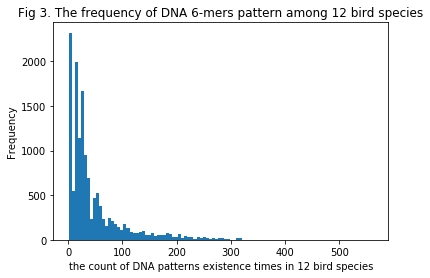

In [30]:
Summary = pd.DataFrame(summary_feature_df.sum(axis=1),columns = ['count'])
Summary.sort_values(by = 'count',ascending = False)
#Summary['Percent']=Summary['count']/sum(Summary['count'])*100
Summary['count'].plot.hist(bins = 100)
#display(Summary)
plt.title('Fig 3. The frequency of DNA 6-mers pattern among 12 bird species')
plt.xlabel('the count of DNA patterns existence times in 12 bird species')

Figure 4 is a heatmap visualization of the frequency of each feature occuring in a species. To plot this graph, the occurences of a feature in one species were normalized by dividing the total occurences of the feature. The brighter the bar is, the higher the occurence frequency the feature is in one species. We can see that multiple features have demonstrate high occurance rate in one species rather than the other, represented by the bright orange bars.

Text(0.5, 1, 'Fig 4. Frequency of a 6-mer feature in each bird species')

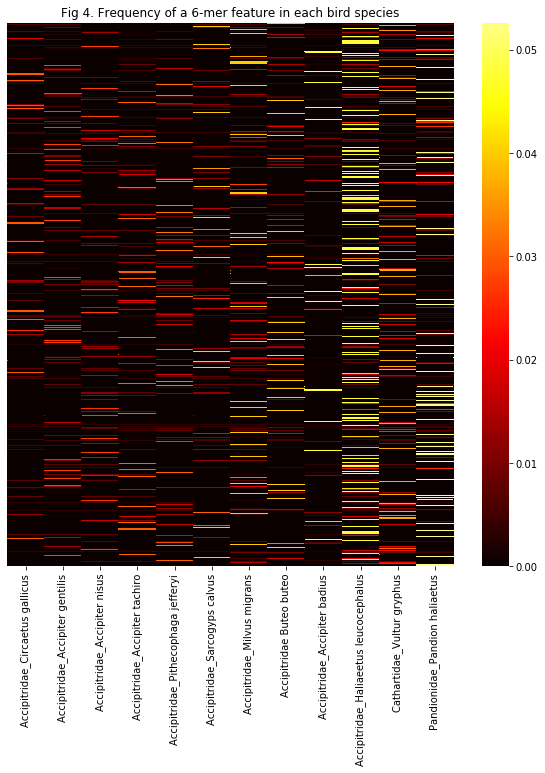

In [31]:
# the percentage that a sequence occur in a bird of a specific species
summary_feature_df_normalized = summary_feature_df.copy()
Summary = pd.DataFrame(summary_feature_df.sum(axis=1),columns = ['count'])
species_total = ['Accipitridae_Circaetus gallicus','Accipitridae_Accipiter gentilis','Accipitridae_Accipiter nisus','Accipitridae_Accipiter tachiro','Accipitridae_Pithecophaga jefferyi','Accipitridae_Sarcogyps calvus','Accipitridae_Milvus migrans','Accipitridae Buteo buteo','Accipitridae_Accipiter badius','Accipitridae_Haliaeetus leucocephalus','Cathartidae_Vultur gryphus','Pandionidae_Pandion haliaetus']
for i in species_total:
    summary_feature_df_normalized[i]=summary_feature_df_normalized[i]/Summary['count']
    summary_feature_df_normalized[i]=summary_feature_df_normalized[i]/sum(birds_COI_df['Species']==i)

#display (summary_feature_df_normalized)    
f, (ax) = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(summary_feature_df_normalized, yticklabels=False,ax=ax,
                 cbar_ax=None,
                 cbar_kws={"orientation": "vertical"},center = 0.03,cmap ="hot")
plt.title('Fig 4. Frequency of a 6-mer feature in each bird species')

After examining the features and their distribution among our data sequences, we split the data for train and test groups. Three widely used models were applied for machine learning: Multinomial Naive Bayes's classification, Decision Tree, and Random Forests. A confusion matrix was used to display the training results along with accuracy, precision, F1, and recall score. The code was shown as below: 

In [32]:
# Splitting the bird sequence dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_data,test_size = 0.20)


In [33]:
def get_metrics(y_test, y_predicted):
    print("Confusion matrix\n")
    Confusionmatrix = (pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return Confusionmatrix, accuracy, precision, recall, f1

A group of supervised learning algorithms known as naive Bayes methods utilize Bayes' theorem with the "naive" assumption that each pair of features is conditionally independent given the value of the class variable (1.9. Naive Bayes, n.d.). 

In package scikit-learn, there are three naive Bayes classification algorithms, including Gaussian Naive Bayes, Multinomial Naive Bayes, and Bernoulli Naive Bayes. These three classes are applicable to different classification scenarios. In general, GaussianNB works better if the distribution of sample features is mostly continuous values. MultinomialNB is appropriate if the distribution of sample characteristics is mostly multivariate discrete. If the sample features are binary discrete values or very sparse multivariate discrete values, BernoulliNB should be used.

Our data seem multivariate discrete and fit multinomial distribution, therefore we select to use Multinomial Naive Bayes classification. 

In [34]:
# Multinomial Naive Bayes's classification
classifier_MultinomialNB = MultinomialNB(alpha=1)
classifier_MultinomialNB.fit(X_train, y_train)


MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

The principle of Decision Trees (DTs) is to construct a model based on the simple decision rules of the training data and then predict the target values. The model will be better if the trees are deeper, but to avoid over fitting we should set the maximum depth of the tree or the minimum samples to split nodes. 

In [35]:
# Decision tree
classifier_DecisionTree = DecisionTreeClassifier(criterion = "entropy", random_state = 0, max_depth = 5)
#max_depth decides the maximum depth of the tree
classifier_DecisionTree.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

The random forest algorithm, which uses feature randomness in addition to bagging produce an uncorrelated forest of decision trees (What Is Random Forest?, 2021).

In [36]:
#Random Forest
classifier_RFC = RandomForestClassifier(n_estimators = 300, criterion = "entropy", random_state = 0)
classifier_RFC.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## 4 Results

After training the data using three models above, we used the models to predict the test data and created a matrix for each model to show the matches between prediction and test data. The rectangulars on diagonal in matrixes represent the samples that have same values for test and predicted results. 

The result of the Multinomial Naive Bayer's model is as below:

Multinomial Naive Bayer's model seems a good model based on the result. The accuracy, precision, recall and f1 values are all 100%.

In [37]:
#test results
y_pred= classifier_MultinomialNB.predict(X_test)
Confusionmatrix,accuracy_MultinomialNB, precision_MultinomialNB, recall_MultinomialNB, f1_MultinomialNB = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy_MultinomialNB, precision_MultinomialNB, recall_MultinomialNB, f1_MultinomialNB))
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
Confusionmatrix.style.background_gradient(cmap='RdYlGn')

Confusion matrix

accuracy = 1.000 
precision = 1.000 
recall = 1.000 
f1 = 1.000


Predicted,Accipitridae Buteo buteo,Accipitridae_Accipiter badius,Accipitridae_Accipiter gentilis,Accipitridae_Accipiter nisus,Accipitridae_Accipiter tachiro,Accipitridae_Circaetus gallicus,Accipitridae_Haliaeetus leucocephalus,Accipitridae_Milvus migrans,Accipitridae_Pithecophaga jefferyi,Accipitridae_Sarcogyps calvus,Cathartidae_Vultur gryphus,Pandionidae_Pandion haliaetus
Actual,,,,,,,,,,,,
Accipitridae Buteo buteo,6,0,0,0,0,0,0,0,0,0,0,0
Accipitridae_Accipiter badius,0,2,0,0,0,0,0,0,0,0,0,0
Accipitridae_Accipiter gentilis,0,0,7,0,0,0,0,0,0,0,0,0
Accipitridae_Accipiter nisus,0,0,0,7,0,0,0,0,0,0,0,0
Accipitridae_Accipiter tachiro,0,0,0,0,5,0,0,0,0,0,0,0
Accipitridae_Circaetus gallicus,0,0,0,0,0,3,0,0,0,0,0,0
Accipitridae_Haliaeetus leucocephalus,0,0,0,0,0,0,6,0,0,0,0,0
Accipitridae_Milvus migrans,0,0,0,0,0,0,0,6,0,0,0,0
Accipitridae_Pithecophaga jefferyi,0,0,0,0,0,0,0,0,7,0,0,0


The result of the Decision Tree model is as below:

In the matrix, Decision Tree makes a good prediction for the bird species. The accuracy of the results is always larger than 0.90 and almost 0.95 on average.

In [38]:
y_pred= classifier_DecisionTree.predict(X_test)
Confusionmatrix,accuracy_DecisionTree, precision_DecisionTree, recall_DecisionTree, f1_DecisionTree = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy_DecisionTree, precision_DecisionTree, recall_DecisionTree, f1_DecisionTree))
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
Confusionmatrix.style.background_gradient(cmap='RdYlGn')

Confusion matrix

accuracy = 0.970 
precision = 0.975 
recall = 0.970 
f1 = 0.970


Predicted,Accipitridae Buteo buteo,Accipitridae_Accipiter badius,Accipitridae_Accipiter gentilis,Accipitridae_Accipiter nisus,Accipitridae_Accipiter tachiro,Accipitridae_Circaetus gallicus,Accipitridae_Haliaeetus leucocephalus,Accipitridae_Milvus migrans,Accipitridae_Pithecophaga jefferyi,Accipitridae_Sarcogyps calvus,Cathartidae_Vultur gryphus,Pandionidae_Pandion haliaetus
Actual,,,,,,,,,,,,
Accipitridae Buteo buteo,5,0,0,0,0,0,0,0,0,0,0,1
Accipitridae_Accipiter badius,0,2,0,0,0,0,0,0,0,0,0,0
Accipitridae_Accipiter gentilis,0,0,7,0,0,0,0,0,0,0,0,0
Accipitridae_Accipiter nisus,0,0,0,6,1,0,0,0,0,0,0,0
Accipitridae_Accipiter tachiro,0,0,0,0,5,0,0,0,0,0,0,0
Accipitridae_Circaetus gallicus,0,0,0,0,0,3,0,0,0,0,0,0
Accipitridae_Haliaeetus leucocephalus,0,0,0,0,0,0,6,0,0,0,0,0
Accipitridae_Milvus migrans,0,0,0,0,0,0,0,6,0,0,0,0
Accipitridae_Pithecophaga jefferyi,0,0,0,0,0,0,0,0,7,0,0,0


The result of the Random Forest model is as below:

In [39]:
y_pred = classifier_RFC.predict(X_test)
Confusionmatrix,accuracy_RFC, precision_RFC, recall_RFC, f1_RFC = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy_RFC, precision_RFC, recall_RFC, f1_RFC))
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
Confusionmatrix.style.background_gradient(cmap='RdYlGn')

Confusion matrix

accuracy = 0.985 
precision = 0.988 
recall = 0.985 
f1 = 0.985


Predicted,Accipitridae Buteo buteo,Accipitridae_Accipiter badius,Accipitridae_Accipiter gentilis,Accipitridae_Accipiter nisus,Accipitridae_Accipiter tachiro,Accipitridae_Circaetus gallicus,Accipitridae_Haliaeetus leucocephalus,Accipitridae_Milvus migrans,Accipitridae_Pithecophaga jefferyi,Accipitridae_Sarcogyps calvus,Cathartidae_Vultur gryphus,Pandionidae_Pandion haliaetus
Actual,,,,,,,,,,,,
Accipitridae Buteo buteo,6,0,0,0,0,0,0,0,0,0,0,0
Accipitridae_Accipiter badius,0,2,0,0,0,0,0,0,0,0,0,0
Accipitridae_Accipiter gentilis,0,0,7,0,0,0,0,0,0,0,0,0
Accipitridae_Accipiter nisus,0,0,0,6,1,0,0,0,0,0,0,0
Accipitridae_Accipiter tachiro,0,0,0,0,5,0,0,0,0,0,0,0
Accipitridae_Circaetus gallicus,0,0,0,0,0,3,0,0,0,0,0,0
Accipitridae_Haliaeetus leucocephalus,0,0,0,0,0,0,6,0,0,0,0,0
Accipitridae_Milvus migrans,0,0,0,0,0,0,0,6,0,0,0,0
Accipitridae_Pithecophaga jefferyi,0,0,0,0,0,0,0,0,7,0,0,0


Random Forest algorithm has a higher F1 score compared with Decision Tree. Decision trees run the risk of overfitting as they tend to tightly fit all the samples within training data. However, when there’s a robust number of decision trees in a random forest, the classifier won’t overfit the model since the averaging of uncorrelated trees lowers the overall variance and prediction error ([IBM Cloud Education, 2020](https://www.ibm.com/cloud/learn/random-forest)). 

To avoid overfitting in our models, we used cross-validation to validate the effectiveness of the models. We split our data into five parts and use each part as the test data one time to better validate. The three blocks of codes below are cross-validation for three models respectively. The codes stored each mean and standard score into lists and output the average scores. Also, we calculated the time for each model to apply for 100 times to judge their efficiency.  

In [42]:
#cross validation
n=100
mean1=[]
std1=[]
start1 = time.time()
while n>0:
    
    # prepare the cross-validation procedure
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    # create model
    model = MultinomialNB()
    # evaluate model
    scores = cross_val_score(model, X, y_data, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    #print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    mean1.append(mean(scores))
    std1.append(std(scores))
    n-=1

end1 = time.time()
time1 = end1-start1
meanscore1 = sum(mean1)/len(mean1)
stdscore1 = sum(std1)/len(std1)
print('Accuracy: %.3f (%.3f)' % (meanscore1, stdscore1))
print(f"{100} times MultinomialNB Time Taken: {time1:.03f}s")

Accuracy: 1.000 (0.000)
100 times MultinomialNB Time Taken: 6.389s


In [44]:
#cross validation
n=100
mean2=[]
std2=[]
start2 = time.time()
while n>0:
    
    # prepare the cross-validation procedure
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    # create model
    model = DecisionTreeClassifier()
    # evaluate model
    scores = cross_val_score(model, X, y_data, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    #print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    mean2.append(mean(scores))
    std2.append(std(scores))
    n-=1

end2 = time.time()
time2 = end2-start2
meanscore2 = sum(mean2)/len(mean2)
stdscore2 = sum(std2)/len(std2)
print('Accuracy: %.3f (%.3f)' % (meanscore2, stdscore2))
print(f"{100} times DecisionTree Time Taken: {time2:.03f}s")

Accuracy: 0.976 (0.015)
100 times DecisionTree Time Taken: 14.944s


In [48]:
#cross validation
n=100
mean3=[]
std3=[]
start3 = time.time()
while n>0:
    
    # prepare the cross-validation procedure
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    # create model
    model = RandomForestClassifier()
    # evaluate model
    scores = cross_val_score(model, X, y_data, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    #print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    mean3.append(mean(scores))
    std3.append(std(scores))
    n-=1

end3 = time.time()
time3 = end3-start3
meanscore3 = sum(mean3)/len(mean3)
stdscore3 = sum(std3)/len(std3)
print('Accuracy: %.3f (%.3f)' % (meanscore3, stdscore3))
print(f"{100} times Random Forest Time Taken: {time3:.03f}s")

Accuracy: 0.991 (0.012)
100 times Random Forest Time Taken: 31.967s


As mean score is the average of the accuracy of all test times, the model should be more accurate with a higher mean score. And the standard score in parentheses is the difference of test value and the mean dividing the standard deviation, which represents a better model if its value is smaller. 
Therefore, from accuracy above, Multinomial Naive Bayes'classifier shows the best results while Decision Tree shows the worst. The Multinomial Naive Bayes' classifier should also be the most efficient one among the models as it has the least time to finish applying.

Then to visualize the results, we used the mean scores' values in lists of the above cross validation part to plot Figure 6 below. As the mean scores closer to 1, the better the model fits, Multinomial Naive Bayes' model has the best performance among the three models. Both Decision Trees model and Random Forest model have mean scorces bouncing back and forth in the figure, but the mean scores of Decision Trees have a smaller average.

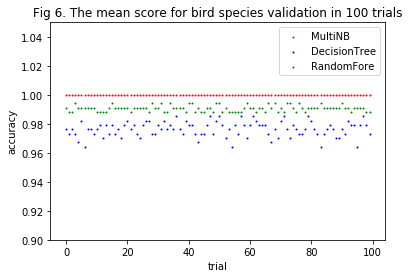

In [49]:
import numpy as np
import matplotlib.pyplot as plt
list_1 = list()
for x in range(100):
    list_1.append(x)
x = list_1
y1 = mean1
y2 = mean2
y3 = mean3
plt.scatter(x, y1, c='r', alpha=1,s = 1)
plt.scatter(x, y2, c='b', alpha=1,s = 1)
plt.scatter(x, y3, c='g', alpha=1,s = 1)
plt.ylim((0.9,1.05))
plt.title('Fig 6. The mean score for bird species validation in 100 trials')
plt.xlabel('trial')
plt.ylabel('accuracy')
plt.legend(['MultiNB', 'DecisionTree', 'RandomFore'])
plt.show()

As we have used the cross-validation and got a good result, so the possibility of overfitting is low. Hence, Multinomial Naive Bayes' classifier is a very good model to predict accipitriformes order of birds.

Given the analysis above, it is obvious that Multinomial Naive Bayes classifier has the best performance. To minimize the number of features in our data, which is 13,946. Therefore, we uses mutual information to see if one feature has more say in the final classification. Mutual information is a measure between two (possibly multi-dimensional) random variables X and Y, that quantifies the amount of information obtained about one random variable, through the other random variable ([Huijskens, 2017](https://thuijskens.github.io/2017/10/07/feature-selection/)). 

We plot a scatterplot of n-most important features against Multinomial Naive Bayes's training result. The result indicates that when the feature number increases from 0 to 5, the accuracy boosted from 0.066 to 0.77. When the feature numbers approaches 250, the predicting accuracy increase to 100%. Therefore, to increase running time, 250 features are sufficient for Multinomial Naive Bayes model.

In [67]:
cv = CountVectorizer(ngram_range=(2,4))  
X = cv.fit_transform(birds_COI_texts) #X is a matrix now
y = y_data
Mutual_info = mutual_info_classif(X, y, discrete_features=True)



In [68]:
Feature_select_df = pd.DataFrame(Mutual_info,columns = ['Mutual information'])
Feature_select_df = Feature_select_df.set_index(Feature_df.columns)

In [70]:
Feature_select_df = pd.DataFrame(Mutual_info,columns = ['Mutual information'])
Feature_select_df = Feature_select_df.set_index(Feature_df.columns)
mean_score_total=[]
std_score_total=[]
for j in range (1,321,5): 
    print (j)
    Feature_selected= Feature_select_df.sort_values(by = 'Mutual information',ascending = False).head(j)
    Feature_selected_index=Feature_selected.index
    Feature_selected_df=pd.DataFrame()
    for i in Feature_selected_index:
        Feature_selected_df[i]=Feature_df[i]
    y_data_selected = y_data
    X_selected = Feature_selected_df
#cross validation
    n=10
    mean4=[]
    std4=[]

    while n>0:
    
    # prepare the cross-validation procedure
        cv = KFold(n_splits=5, random_state=1, shuffle=True)
    # create model
        model = MultinomialNB()
    # evaluate model
        scores = cross_val_score(model, X_selected, y_data_selected, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    #print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
        mean4.append(mean(scores))
        std4.append(std(scores))
        n-=1
    meanscore4 = sum(mean4)/len(mean4)
    mean_score_total.append(meanscore4)
    stdscore4 = sum(std4)/len(std4)
    std_score_total.append(stdscore4)
    print('Accuracy: %.3f (%.3f)' % (meanscore4, stdscore4))


1
Accuracy: 0.066 (0.020)
6
Accuracy: 0.770 (0.060)
11
Accuracy: 0.881 (0.023)
16
Accuracy: 0.916 (0.026)
21
Accuracy: 0.943 (0.022)
26
Accuracy: 0.946 (0.020)
31
Accuracy: 0.958 (0.032)
36
Accuracy: 0.964 (0.034)
41
Accuracy: 0.964 (0.034)
46
Accuracy: 0.967 (0.033)
51
Accuracy: 0.967 (0.033)
56
Accuracy: 0.967 (0.033)
61
Accuracy: 0.967 (0.033)
66
Accuracy: 0.967 (0.033)
71
Accuracy: 0.967 (0.033)
76
Accuracy: 0.967 (0.033)
81
Accuracy: 0.967 (0.033)
86
Accuracy: 0.967 (0.033)
91
Accuracy: 0.967 (0.033)
96
Accuracy: 0.967 (0.033)
101
Accuracy: 0.967 (0.033)
106
Accuracy: 0.967 (0.033)
111
Accuracy: 0.970 (0.034)
116
Accuracy: 0.973 (0.036)
121
Accuracy: 0.973 (0.036)
126
Accuracy: 0.973 (0.036)
131
Accuracy: 0.973 (0.036)
136
Accuracy: 0.967 (0.033)
141
Accuracy: 0.967 (0.033)
146
Accuracy: 0.964 (0.034)
151
Accuracy: 0.964 (0.034)
156
Accuracy: 0.964 (0.034)
161
Accuracy: 0.964 (0.034)
166
Accuracy: 0.964 (0.034)
171
Accuracy: 0.964 (0.034)
176
Accuracy: 0.964 (0.034)
181
Accuracy: 

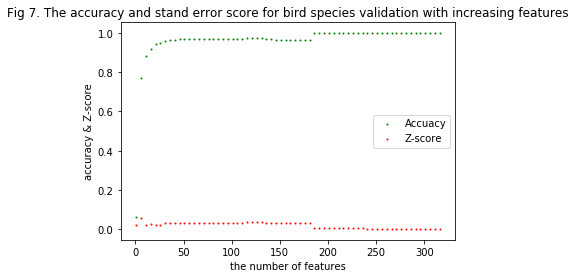

In [71]:
X_axis = []
for j in range (1,321,5):
    X_axis.append(j)
plt.scatter(X_axis, mean_score_total, c='g', alpha=1,s = 1)
plt.scatter(X_axis, std_score_total, c='r', alpha=1,s = 1)
plt.title('Fig 7. The accuracy and stand error score for bird species validation with increasing features')
plt.xlabel('the number of features')
plt.ylabel('accuracy & Z-score')
plt.legend(['Accuacy', 'Z-score'])
plt.show()

## 5 Conclusions 

Depending on above results, we draw the conclusions that all three models can predict the accipitriformes families well. Among them, Multinomial Naive Bayes' classifier fits best with stable preformances and great efficiency. The Random Forest classifier fits better than Decision Tree and worse than Multinomial Naive Bayes. The Decision Tree classifier is the most unstable one with lowest mean scores. We also find out that around 250 features are enough to classify bird species using Multinomial Naive Bayes model.

## 6 Individual Contribution 

Zhujun Yao:  Retrieve data and process it using K-mer algorithm, train and analyze data using Random Forest classifier, conduct feature selection, write part of the background.

Yifei Gao:  Train and analyze data using Decision Tree classifier, use Cross Validation to validate the models and get results, write the conclusion.

Winnie Liao:  Train and analyze data using Multinomial Naive Bayes classification, write introduction and part of the background. 


## References
Accipitriformes. (2022). In Wikipedia. https://en.wikipedia.org/w/index.php?title=Accipitriformes&oldid=1104903702

Brownlee, J. (2020). *Repeated k-Fold Cross-Validation for Model Evaluation in Python*. Machine Learning Mastery. https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

Carignan, V., & Villard, M.-A. (2002). Selecting indicator species to monitor ecological integrity: A review. Environmental Monitoring and Assessment, 78(1), 45–61.

Cruz, C., Santulli-Sanzo, G., & Ceballos, G. (2021). Global patterns of raptor distribution and protected areas optimal selection to reduce the extinction crises. Proceedings of the National Academy of Sciences, 118(37), e2018203118. https://doi.org/10.1073/pnas.2018203118

Csűrös, M., Noé, L., & Kucherov, G. (2007). Reconsidering the Significance of Genomic Word Frequencies. Trends in Genetics, 23(11), 543–546. https://doi.org/10.1016/j.tig.2007.07.008

Das, S., Deb, T., Dey, N., Ashour, A. S., Bhattacharya, D. K., & Tibarewala, D. N. (2018). Optimal choice of k-mer in composition vector method for genome sequence comparison. Genomics, 110(5), 263–273. https://doi.org/10.1016/j.ygeno.2017.11.003

Environmental DNA - Wikipedia. (n.d.). Retrieved September 29, 2022, from https://en.wikipedia.org/wiki/Environmental_DNA

Evolutionary biology—Latest research and news | Nature. (n.d.). Retrieved September 29, 2022, from https://www.nature.com/subjects/evolutionary-biology

Gonçalves, P. F. M., Oliveira-Marques, A. R., Matsumoto, T. E., & Miyaki, C. Y. (2015). DNA Barcoding Identifies Illegal Parrot Trade. Journal of Heredity, 106(S1), 560–564. https://doi.org/10.1093/jhered/esv035

Hawkwatch International—Why Raptors? (n.d.). Retrieved September 29, 2022, from https://hawkwatch.org/learn/why-raptors

Huijskens, T. (2017, October 7). Mutual information-based feature selection. Thomas Huijskens. https://thuijskens.github.io/2017/10/07/feature-selection/

IBM Cloud Education. (2020, December 7). What is random forest? Www.ibm.com. https://www.ibm.com/cloud/learn/random-forest

Lumpe, J. (2022, October 16). Biopython/biopython. GitHub. https://github.com/biopython/biopython/blob/master/Bio/Entrez/__init__.py


Mabragaña, E., Díaz de Astarloa, J. M., Hanner, R., Zhang, J., & González Castro, M. (2011). DNA Barcoding Identifies Argentine Fishes from Marine and Brackish Waters. PLoS ONE, 6(12), e28655. https://doi.org/10.1371/journal.pone.0028655

McClure, C. J. W., & Rolek, B. W. (2020). Relative Conservation Status of Bird Orders With Special Attention to Raptors. Frontiers in Ecology and Evolution, 8. https://www.frontiersin.org/articles/10.3389/fevo.2020.593941


Naive bayes. (n.d.). Scikit-Learn. Retrieved September 29, 2022, from https://scikit-learn/stable/modules/naive_bayes.html

NCBI. (2019). National center for biotechnology information. Nih.gov. https://www.ncbi.nlm.nih.gov/

Purvis, A., & Hector, A. (2000). Getting the measure of biodiversity. Nature, 405(6783), 212–219. https://doi.org/10.1038/35012221

Ph.D, E. B. (2022, June 10). Apply Machine Learning Algorithms for Genomics Data Classification. MLearning.ai. https://medium.com/mlearning-ai/apply-machine-learning-algorithms-for-genomics-data-classification-132972933723

Pornputtapong, N., Acheampong, D. A., Patumcharoenpol, P., Jenjaroenpun, P., Wongsurawat, T., Jun, S.-R., Yongkiettrakul, S., Chokesajjawatee, N., & Nookaew, I. (2020). KITSUNE: A Tool for Identifying Empirically Optimal K-mer Length for Alignment-Free Phylogenomic Analysis. Frontiers in Bioengineering and Biotechnology, 8. https://doi.org/10.3389/fbioe.2020.556413

Pedregosa et al. (2011). *Cross-validation: Evaluating Estimator Performance.* Scikit-learn. https://scikit-learn.org/stable/modules/cross_validation.html

Pedregosa et al. (2011). *Machine Learning in Python: Decision Trees.* JMLR 12, pp. 2825-2830. Scikit-learn. https://scikit-learn.org/stable/modules/tree.html#tree

UNIVERSITY OF CONNECTICUT. (2017, January 4). Genome Size Estimation Tutorial | Computational Biology Core. https://bioinformatics.uconn.edu/genome-size-estimation-tutorial/#:~:text=The%20k%2Dmer%20frequency%20follows

Wang, Y., Chen, Q., Deng, C., Zheng, Y., & Sun, F. (2020). KmerGO: A Tool to Identify Group-Specific Sequences With k-mers. Frontiers in Microbiology, 11. https://doi.org/10.3389/fmicb.2020.02067
‌
